# Quantum Computing Tutorial (Part 1)
Adam Lyon/Fermilab SCD

December 13, 2018

Hi, I'm Adam...

I'm a Fermilab Senior Scientist.

I mostly work managing part of the Scientific Computing Division and am a scientist on the Muon g-2 Experiment. 

<center><img src="images/gm2.jpg" width="40%"/></center>

I'm involved in Quantum Computing because it is applicable to my SCD role and I'm interested in how HEP researchers would use such systems (infrastructure, interfaces).

...and it's WAY COOL and new for me. Nothing like giving a tutorial to force yourself to learn something new. 

# Previous epsiodes

Jim Amundson give two [Introduction to QIS](https://indico.fnal.gov/event/19300/) talks. Remember, there's lots of hype:

<img src="images/hypeMS.png">



# Hype on a plot
<img src="images/hype.png" style="float:left;" width="60%"/>
<img src="images/hype2.png" style="clear:right;" width="40%"/>

# Real excitement (putting money into it)
### $1.275B over FY19-23 to NIST, NSF, DOE !!  Should be passed soon.
https://www.congress.gov/bill/115th-congress/house-bill/6227/text
<img src="images/nqi.png" width="70%">




# Outline for today

- Refresh our memories about quantum (and some classical) phenomena
- Examine single qubits
- Learn about quantum gates
- Examine multiple qubits
- Go through an algorithm that exhibits quantum speedup (why this is exciting!)
- Look at Quantum Teleportation

# Next time (Tuesday 12/18)

- Whatever we don't get done today
- Do a brief look at how superconducting quantum computers work and their sources of error
- Examine the available Quantum Computing tools that you can use
- We'll actually try some algorithms on a simulator
- Look at where this is going

# Preparing for next time

If you want to follow along and try things yourself. You will need access to the QC tools. 
You have several options each with plusses and minusses. See https://github.com/lyon-fnal/qc-tutorial-fnal

If you want to go the `docker` route and don't have docker installed, please try the instructions (they involve a ~5 GB download) sometime before Tuesday morning (but not right now). 

# Ask questions throughout!

### But keep in mind what my grad school quantum professor once said...

> "Hopefully I'll show you a little more than what you already know.<Br/>It's certainly a little more than what I already know!"<Br/> -- Rabindra Mohpatra (U of Maryland)

## Resources 

There are LOTS of resources you can use to learn about this stuff (books, lecture notes, papers., videos, slides, notebooks). Each does their "own take" on the subject. I'm pulling mainly from...

- Scott Aaronson's [Lecture notes](https://www.scottaaronson.com/blog/?p=3943)
- Dave BaconSE CS5699d [Lecture notes](https://courses.cs.washington.edu/courses/cse599d/06wi/)
- *Quantum Computing Explained*, David McMahon [Online via Fermilab Library](http://www-spires.fnal.gov/spires/find/books/www?cl=0470096993:ONLINE) (Thanks Pengfei!)
- *Quantum Computation and Quantum Information* Michael Neilsen & Issac Chuang (MNIC) [Online](http://csis.pace.edu/ctappert/cs837-18spring/QC-textbook.pdf)
- Matthew Otten's Argonne Tutorial and [notebook](https://github.com/zhenghh04/QCWorkshop/tree/master/IntroQM)

Argonne is doing tutorials too!

Mistakes that follow are, of course, mine alone. 



Let's go... Remember Probability... 
<img src="images/coinFlip.png" width="30%" style="float:right;">

Say we have coin that is either heads or tails. 

A vector of classical probabilities can describe this system:

$ \begin{bmatrix}
           \text{Probability of heads goes here:  } P_h \\
           \text{Probability of tails goes here:  } P_t
\end{bmatrix}^h_t$

We'll use this sort of notation throughout!

$ \begin{bmatrix}
           a \\
           b 
\end{bmatrix}^h_t
$ where $a, b \geq 0$ and $a+b=1$


 We can not touch the coin ; We can turn the coin over 

$ \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ \end{bmatrix} \begin{bmatrix}a \\ b\end{bmatrix}^h_t = \begin{bmatrix}a \\ b\end{bmatrix}^h_t \, \, ; \, \,  \begin{bmatrix} 0 & 1 \\ 1 & 0 \\ \end{bmatrix} \begin{bmatrix}a \\ b\end{bmatrix}^h_t = \begin{bmatrix}b \\ a\end{bmatrix}^h_t$ 

e.g. the transformation matrix is $\begin{bmatrix} P(\text{heads}|a) & P(\text{heads}|b) \\ P(\text{tails}|a) & P(\text{tails}|b)\end{bmatrix}$

so the old probability for heads is now the probability for tails and vice-versa

We can fairly flip the coin...

$ \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} \\ \end{bmatrix} \begin{bmatrix}a \\ b\end{bmatrix}^h_t = \begin{bmatrix}\frac{1}{2}(a+b) \\ \frac{1}{2}(a+b)\end{bmatrix}^h_t = \begin{bmatrix}\frac{1}{2} \\ \frac{1}{2}\end{bmatrix}^h_t$ 

We can do fancier things, like flip the coin, and if we get heads flip again but if we get tails we turn it to heads

$a$ is $P(\text{heads})$ and $b$ is $P(\text{tails})$ after the frist flip.

$ \begin{bmatrix}\frac{1}{2} & 1 \\ \frac{1}{2} & 0 \end{bmatrix} \begin{bmatrix}a \\ b\end{bmatrix}^h_t = \begin{bmatrix}\frac{1}{2}a + b \\ \frac{1}{2} a\end{bmatrix}^h_t  $ ... remember $\begin{bmatrix} P(\text{heads}|a) & P(\text{heads}|b) \\ P(\text{tails}|a) & P(\text{tails}|b)\end{bmatrix}$

If flip and get heads, then $a=1, b=0$. Flip again and final outcome is random $\begin{bmatrix}1/2 \\ 1/2\end{bmatrix}^h_t $<br/>
If flip and get tails, then $a=0, b=1$. Turn over and always get heads. $\begin{bmatrix}1 \\ 0\end{bmatrix}^h_t$ <br/>
Sum of columns are 1. 


Now two coins $ \begin{bmatrix} a \\ b \end{bmatrix}^{h_1}_{t_1} ,\; \begin{bmatrix} c \\ d \end{bmatrix}^{h_2}_{t_2} $

The combined probability is the **tensor product**

$ \begin{bmatrix} a \\ b \end{bmatrix}^{h_1}_{t_1} \bigotimes \begin{bmatrix} c \\ d
\end{bmatrix}^{h_2}_{t_2} = \, \, 
\begin{bmatrix} a \begin{bmatrix} c \\ d \end{bmatrix}^{h_2}_{t_2} \\ b \begin{bmatrix} c \\ d \end{bmatrix}^{h_2}_{t_2} \end{bmatrix} \, \, = 
\begin{bmatrix} ac \\ ad \\ bc \\ bd \end{bmatrix}^{h_{1}h_{2}}_{t_{1}t_{2}} = \begin{bmatrix} P_{hh} \\ P_{ht} \\ P_{th} \\ P_{tt} \end{bmatrix}^{hh}_{tt}  $ 

Example: First coin is fair, second coin is "double headed"...

$
\begin{bmatrix} 1/2 \\ 1/2 \end{bmatrix}^{h_1}_{t_1} \bigotimes \begin{bmatrix} 1 \\ 0 \end{bmatrix}^{h_2}_{t_2} = 
\begin{bmatrix} 1/2 \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\ 1/2 \begin{bmatrix} 1 \\ 0 \end{bmatrix} \end{bmatrix} =  \begin{bmatrix} 1/2 \\ 0 \\ 1/2 \\ 0 \end{bmatrix}^{hh}_{tt} = \begin{bmatrix} P_{hh} \\ P_{ht} \\ P_{th} \\ P_{tt} \end{bmatrix}^{hh}_{tt} $

 Note that some products are impossible for independent coins, like $\begin{bmatrix} 1/2 \\ 0 \\ 0 \\ 1/2 \end{bmatrix}^{hh}_{tt} $
 
 How could we make this outcome reality?

Say we turn over the second coin only if the first coin is tails

$ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} ac \\ ad \\ bc \\ bd \end{bmatrix}^{hh}_{tt} =  \begin{bmatrix} ac \\ ad \\ bd \\ bc \end{bmatrix}^{hh}_{tt}\; \; $ (called controlled not, **CNOT**)

Try starting with first coin random, second coin heads<br/>
$ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 1/2 \\ 0 \\ 1/2 \\ 0 \end{bmatrix}^{hh}_{tt} =  \begin{bmatrix} 1/2 \\ 0 \\ 0 \\ 1/2 \end{bmatrix}^{hh}_{tt} $  50% both coins head, 50% both coins tails

You can't get this with independent coins! The coins are now correlated. Hmmmm (we'll see this again)

Let's go Quantum...

## Amplitudes and Probabilities

A classical configuration is given by a probability for it occurring, $p \in [0, 1]$ 

A quantum configuration is given by a complex amplitude $\alpha \in \mathbb{C}$, probability of measuring the quantum system in that configuration is $p = |\alpha|^2$

![](images/doubleslit.png) (Wikipedia)

This is a key difference between classical and quantum systems!

So now using amplitudes...

$ \begin{bmatrix} \alpha \\ \beta \end{bmatrix}^0_1 $ (for a two-state system - measured in state "0" or "1")

The probability that a measurement shows the system is 

in state 0 is $|\alpha|^2$ and is in state 1 is $|\beta|^2$ 

and $|\alpha|^2 + |\beta|^2 = 1$

System state described by unit vector in Hilbert space $\cal{H}$

We can simplify $ \begin{bmatrix} \alpha \\ \beta \end{bmatrix}^0_1 $ with 

$ \left|0\right> = \begin{bmatrix} 1 \\ 0 \end{bmatrix}^0_1  $ and $\left|1\right> = \begin{bmatrix} 0 \\ 1 \end{bmatrix}^0_1  $(these are basis vectors - the *Computational basis*)

So, $ \begin{bmatrix} \alpha \\ \beta \end{bmatrix}^0_1 = \alpha \left|0\right> + \beta \left|1\right> = \left|\psi\right> $ 

$ \left|\psi\right> = \alpha \left|0\right> + \beta \left|1\right> = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} $ (ket - column vector) 

$ \left<\psi\right| = \alpha^* \left<0\right| + \beta^* \left<1\right| = \begin{bmatrix} \alpha^* \; \beta^* \end{bmatrix} $ (bra - Hermitian conjugate - row vector)

$\left<v|w\right>$ is the inner product (projection of state $w$ onto $v$)

$ \left<\psi | \psi \right> = \alpha^* \alpha \left<0|0\right>  + \beta^* \beta \left<1|1\right> = |\alpha|^2 + |\beta|^2 = 1 $

$ \left< 0 | 1 \right> = \left< 1 | 0 \right> = 0 $ (basis vectors are ortho-normal)

$\left<v|w\right> = \left<w|v\right>^*$

Linear transformation changes quantum states $U \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} \alpha' \\ \beta' \end{bmatrix} $

$U$ is **unitary** if $| \alpha |^2 + | \beta |^2 = | \alpha' |^2 + | \beta' |^2 $ (preserves the norm)

A unitary matrix maps to a unitary transformation

$ \left|\psi'\right> = \alpha' \left|0\right> + \beta' \left|1\right> =  U \left|\psi\right> $

Unitary transformations preserve the the norm

$ \left< \psi | \psi \right> = \Big(U \left| \psi \right>\Big)^\dagger \; U\left|\psi\right> = \left< \psi | U^\dagger U | \psi \right>$

So, for any $\psi$, $U^\dagger U = I$ and thus $U^{-1} = U^\dagger$

and the rows of $U$ form and ortho-normal unit basis

We can transform to other bases, such as,

$\left| + \right> = \frac{\left| 0 \right> + \left| 1 \right>}{\sqrt{2}}, \; 
\left| - \right> = \frac{\left| 0 \right> - \left| 1 \right>}{\sqrt{2}} $  (*Hadamard Basis*)

$\left| i \right> = \frac{\left| 0 \right> + i\left| 1 \right>}{\sqrt{2}}, \; 
\left| -i \right> = \frac{\left| 0 \right> - i\left| 1 \right>}{\sqrt{2}} $

Rotating into other bases, for example,

$ R_\theta = \begin{bmatrix} \cos\theta && -\sin\theta \\ \sin\theta && \cos\theta \end{bmatrix} $, so $ R_{\pi/4} = \begin{bmatrix} 1/\sqrt{2} && -1/\sqrt{2} \\ 1/\sqrt{2} && 1/\sqrt{2} \end{bmatrix} $

And

$R_{\pi/4} \left| 0 \right> = \left| + \right> $, $R_{\pi/4} \left| + \right> = \left| 1 \right>$

$R_{\pi/4} \left| 1 \right> = -\left| - \right> $,

This two state system is a *qubit*

Like a classical bit, upon measurement it is either "0" or "1"

Unlike a classical bit, the qubit's amplitude makes for rich phenomena, like superposition

We've seen one *qubit* with $2^1$ states and needs $2^1$ complex amplitudes. 

## Bloch Sphere

We can recast $|\psi\rangle = \alpha |0\rangle> + \beta |1\rangle$  as $  |\psi\rangle = \cos\Big(\frac{\theta}{2}\Big) |0\rangle + e^{i\phi} \sin\Big(\frac{\theta}{2}\Big) |1\rangle$ 

Note that since amplitudes are complex, we need a sphere, not simply 2D polar coordinates. 

Here is a Block sphere...

In [1]:
# If you are running in Google Colab, you need to uncomment the next two lines and run this cell (may take a long time)
#!pip install qutip
#!pip install qiskit

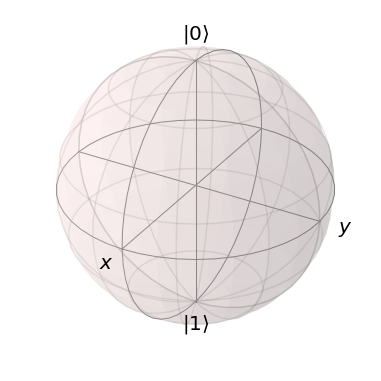

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

b = qt.Bloch()
b.show()

How do we go from four parameters (complex $\alpha$ and $\beta$) down to two?

We can write complex numbers in polar...
$|\psi\rangle = r_\alpha e^{i\phi_\alpha} |0\rangle + r_\beta e^{i\phi_\beta} |1\rangle$ *(4 parameters)*

But what matters are $|\alpha|^2$ and $|\beta|^2$, so we can introduce a global phase and not change observables
$|e^{i\gamma}\alpha|^2 = (e^{i\gamma}\alpha)^{*} (e^{i\gamma}\alpha) = (e^{-i\gamma}\alpha^*) (e^{i\gamma}\alpha) = |\alpha|^2 $

So, let's introduce a convenient global phase, like $|\psi'\rangle = e^{-i\phi_\alpha}|\psi\rangle$

Then, $|\psi'\rangle = r_\alpha |0\rangle + r_\beta e^{i(\phi_\beta - \phi_\alpha)}|1\rangle = r_\alpha |0\rangle + r_\beta e^{i\phi}|1\rangle$ *(3 parameters)*

Switching back to cartesian coordinates for a moment, $|\psi'\rangle = r_\alpha|0\rangle  + (x + iy)|1\rangle$

Since $\langle \psi' | \psi' \rangle = 1$, $r_\alpha^2 + x^2 + y^2 = 1$. This is a unit sphere where $r_\alpha = z$ coordinate

In spherical coordinates, $x = R\sin\theta\cos\phi$, $y = R\sin\theta\sin\phi$, $z = R\cos\theta$ (where $R=1$ from above)

So, $|\psi'\rangle = z |0\rangle + (x+iy)|1\rangle = \cos\theta |0\rangle + e^{i\phi}\sin\theta|1\rangle \, \, $ *(2 parameters)*

Turns out that $\theta$ is somewhat redundant and so
$|\psi\rangle = \cos\frac{\theta}{2} |0\rangle + e^{i\phi}\sin\frac{\theta}{2}|1\rangle$, with $0 \leq \theta \leq \pi$, and $0 \leq \phi \leq 2\pi$

$ |\psi \rangle = | 0 \rangle $

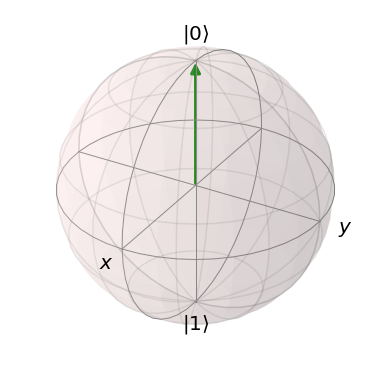

In [3]:
# Make some basis vectors
zero = qt.basis(2, 0)
one  = qt.basis(2, 1)

b.clear()
b.add_states(zero)
b.render()

$ |\psi\rangle = | 1 \rangle $

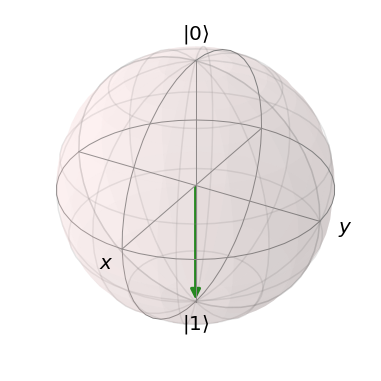

In [4]:
b.clear()
b.add_states(one)
b.render()

Superposition  $|\psi \rangle = \frac{1}{\sqrt{2}} \Big( | 0 \rangle +| 1 \rangle \Big) $

In [5]:
zero+one

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [1.]]

In [6]:
(zero+one).unit()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

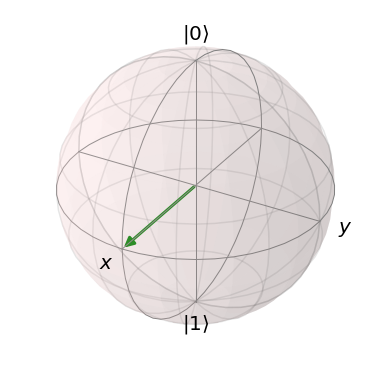

In [7]:
b.clear()
b.add_states( (zero+one).unit() )
b.render()

$ | + \rangle  $ and $ | - \rangle $

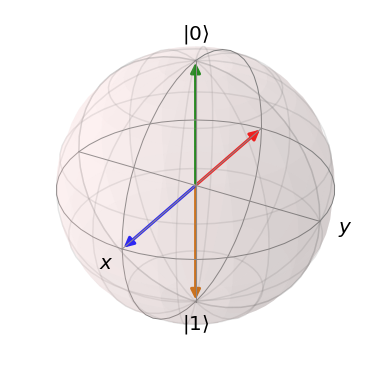

In [8]:
b.clear()
b.add_states( zero )
b.add_states( one )
b.add_states( (zero+one).unit() )
b.add_states( (zero-one).unit() )
b.render()

$ | i \rangle  $ and $ | -i \rangle $

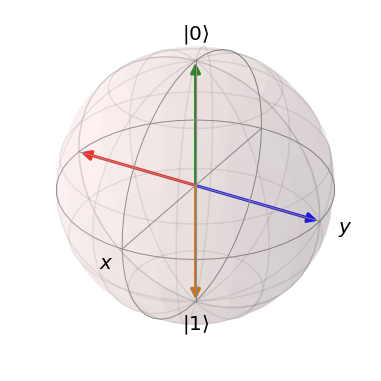

In [9]:
b.clear()
b.add_states( zero )
b.add_states( one )
b.add_states( (zero + 1.j* one).unit() )
b.add_states( (zero - 1.j* one).unit() )
b.render()

Another superposition:
    
$ |\psi\rangle = R_{\pi/3} | 0 \rangle = \frac{1}{2} | 0 \rangle + \frac{\sqrt{3}}{2} | 1 \rangle $; $ P(0) = 1/4, P(1) = 3/4 $

And add a relative phase... $ |\psi'\rangle =  \frac{1}{2} | 0 \rangle + \sqrt{\frac{3}{8}} \, (1 + i) | 1 \rangle; P(0) = 1/4, P(1) = 3/4 $




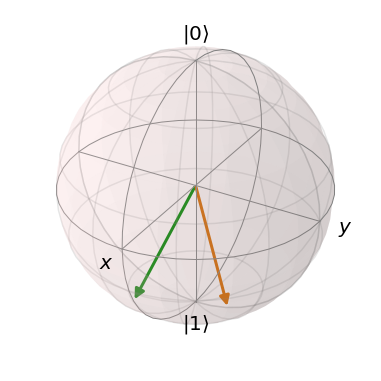

In [10]:
import math
b.clear()
b.add_states( ( 0.5*zero + math.sqrt(3)/2*one ) )
b.add_states( ( 0.5*zero + math.sqrt(3/8)*(1+1.j)*one ) )
b.render()

A note about phases (they're a little confusing)...

A global phase: $|\psi\rangle \rightarrow e^{i\gamma}|\psi\rangle = |\psi'\rangle\, \, $  ($\gamma$ is real)

If we measure with an operator $M$ then $ \langle M \rangle =  \langle \psi | M^\dagger M | \psi \rangle$ 
is the same as $\langle \psi' | M^\dagger M | \psi' \rangle$ since $\langle \psi | e^{-i\gamma} M^\dagger M e^{i\gamma}| \psi \rangle = \langle \psi | M^\dagger M | \psi \rangle$

Global phases do not affect observables and so are unobservable.

A **relative** phase is a different story. We saw an example before, and here's a simpler one...

<center>$ \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ and $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$</center>

Amplitudes (say $a$ and $b$) differ by a relative phase if $a = e^{i\delta}b$ where $\delta$ is real. 

Here, the amplitude of $|1\rangle$ differs by a phase of -1 and so these states differ by a relative phase. 

The relative phase is **basis dependent** (global phase is not) and so measurement statistics are basis dependent. E.g. you can't tell the difference between these states in the $\{0,1\}$ basis but you can definitely tell them apart in the $\{+,-\}$ basis. 

Linear unitary operators evolve quantum systems according to  $i \hbar \frac{d}{dt}|\psi(t)\rangle = H|\psi(t)\rangle $

In quantum computing, we call these operators **gates**. One-qubit gates include the Pauli gates:

Pauli X: $\sigma_x = \begin{bmatrix} 0 && 1 \\ 1 && 0 \end{bmatrix}$, Pauli Y: $\sigma_y = \begin{bmatrix} 0 && -i \\ i && 0 \end{bmatrix}$, Pauli Z: $\sigma_z = \begin{bmatrix} 1 && 0 \\ 0 && -1 \end{bmatrix}$

They just reflect about axes. Can also do with rotations.  $\sigma_x$ is also the NOT gate and is $(R_{\pi/4})^2$

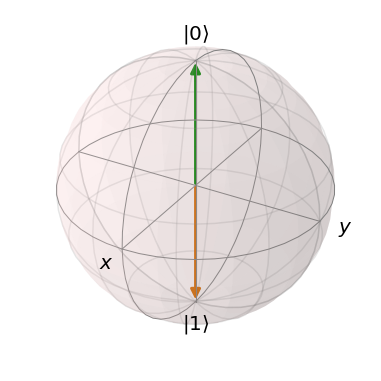

In [11]:
b.clear()
b.add_states(zero)
b.add_states(qt.sigmax()*zero)
b.render()

An extremely important gate is the *Hadamard* gate... $ H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 && 1 \\ 1 && -1 \end{bmatrix}$. 

It will put qubits into and out of the superposition state.

$ H \left| 0 \right> = \frac{1}{\sqrt{2}} \Big(  \left| 0 \right> +  \left| 1 \right> \Big)  =  \left| + \right>$, $ H \left| + \right> = \left| 0 \right> $, $ H \left| 1 \right> = \left| - \right> $, $ H \left| - \right> = \left| 1 \right>$

[[0.70710678+0.j]
 [0.70710678+0.j]]


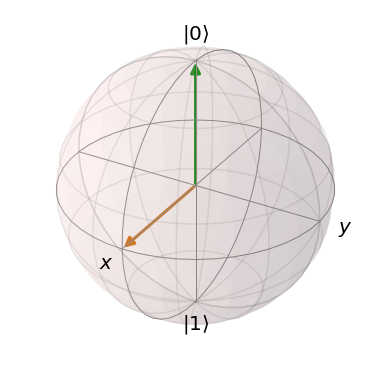

In [12]:
b.clear()
b.add_states(zero)
psi=qt.snot()*zero
print(psi.full())
b.add_states(psi) # Qutip calls Hadamard "S-NOT"
b.render()

A *circuit* is a series of gates on one or more qubits. Time goes to the right. The measurements are assumed to take place in the computational basis. 

Let's do a Hadamard gate and measure the outcome.

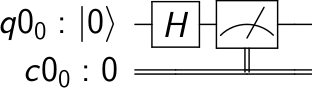

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer, matplotlib_circuit_drawer

q = QuantumRegister(1)
c = ClassicalRegister(1)
h = QuantumCircuit(q, c)
h.h(q)
h.measure(q, c)

circuit_drawer(h)

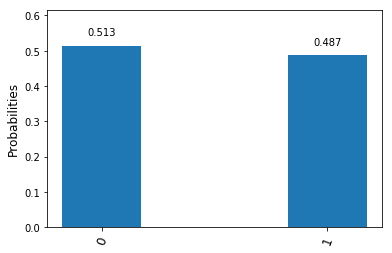

In [14]:
from qiskit import Aer, execute
qasm_backend = Aer.get_backend('qasm_simulator')
job = execute(h, qasm_backend, shots=10000)
plot_histogram(job.result().get_counts(h))

Let's try two...

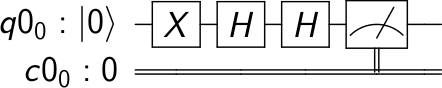

In [15]:
h2 = QuantumCircuit(q, c)
h2.x(q)
h2.h(q)
h2.h(q)
h2.measure(q, c)
circuit_drawer(h2)

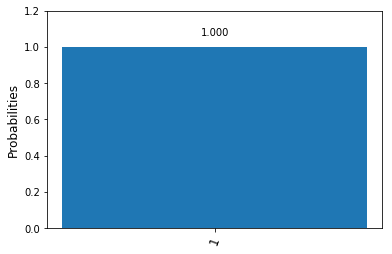

In [16]:
job = execute(h2, qasm_backend, shots=5000)
plot_histogram(job.result().get_counts(h2))

One qubit circuits are kinda boring. Add more qubits!

Hilbert space is now larger $\cal{H} = \cal{H}_1 \otimes \cal{H}_2$

Tensor product: $ \left| \psi \right> =  \left| \text{ qubit #1 state } \right> \otimes \left| \text{ qubit #2 state } \right>$ 
 
We'll use an efficient notation, e.g., $ \left| 0 \right> \otimes \left| 0 \right> =  \left| 0 \right> \left| 0 \right>  = \left| 0, 0 \right> = \left| 00 \right> $

$ \left| \psi \right> = \alpha \left| 00 \right> + \beta \left| 01 \right> + \gamma \left| 10 \right> + \delta \left| 11 \right> $ ... in vector form $ \begin{bmatrix} \alpha \\ \beta \\ \delta \\ \gamma \end{bmatrix}^{00}_{11} $

Probability of, say, both qubits measure to be in 0 state, is $ |\alpha|^2 $

Probability of measuring the first qubit in the 0 state is $ |\alpha|^2 + |\beta|^2$ <br/>
Probability of measuring the first qubit in the 1 state is $ |\delta|^2 + |\gamma|^2$

If we measure the first qubit to be in 0, what is the state of the system now (partial measurements?

$\left| \psi \right> = \left| 0 \right> \bigotimes \frac{ \delta \left| 0 \right> + \gamma \left| 1 \right> }{\sqrt{|\delta|^2 + |\gamma|^2}} $


The dimension of the Hilbert space is how many complex numbers we need to describe a state.

Dimension of $\cal{H}^{\otimes n} = 2^n$

1 qubit state: 2 numbers; 2 qubits = 4; 3 qubits = 8; 20 qubits = ~1M; <BR/> 50 qubits = $\sim 10^{15}$ (Petabytes);
300 qubits = $\sim 10^{90}$ (more than # particles in universe) 

The exponential growth of Hilbert space perhaps indicates some power of computation that is available. 

Gates can affect all or some of the qubits. 

For example, apply NOT gate to qubit 1 leaving qubit 2 alone.

$ \sigma_{x1} = \sigma_x \otimes I_2$  ($I_2$ is $2 \times 2$ identity matrix )

$ \sigma_{x1} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \bigotimes \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = \begin{pmatrix} 0 \begin{pmatrix}1&0\\0&1\end{pmatrix} & 1 \begin{pmatrix}1&0\\0&1\end{pmatrix} \\ 1 \begin{pmatrix}1&0\\0&1\end{pmatrix} & 0 \begin{pmatrix}1&0\\0&1\end{pmatrix} \end{pmatrix} = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{pmatrix} $

$ \sigma_{x1} |\psi\rangle = \sigma_{x1} \left( \alpha|00\rangle + \beta|01\rangle + \delta|10\rangle + \gamma|11\rangle \right) = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{pmatrix} \begin{bmatrix} \alpha \\ \beta \\ \delta \\ \gamma \end{bmatrix} $
$ \sigma_{x1} |\psi\rangle = \begin{bmatrix}\delta \\ \gamma \\ \alpha \\ \beta \end{bmatrix} = \alpha|10\rangle + \beta|11\rangle +  \delta|00\rangle + \gamma|01\rangle$



Let's make a full superposition

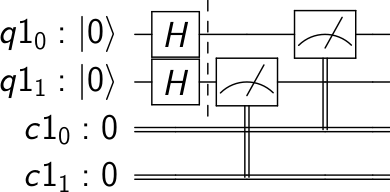

In [17]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
h2 = QuantumCircuit(q2, c2)
h2.h(q2[0])
h2.h(q2[1])
h2.barrier()
h2.measure(q2[0], c2[0])
h2.measure(q2[1], c2[1])
circuit_drawer(h2)

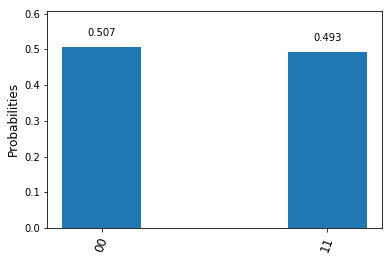

In [24]:
job = execute(h2, qasm_backend, shots=5000)
plot_histogram(job.result().get_counts(h2))

A little more fancy (but kinda dumb)...

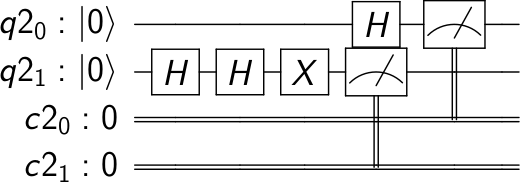

In [19]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
h2 = QuantumCircuit(q2, c2)
h2.h(q2[0])
h2.h(q2[1])
h2.h(q2[1])
h2.x(q2[1])
h2.measure(q2[0], c2[0])
h2.measure(q2[1], c2[1])
circuit_drawer(h2)

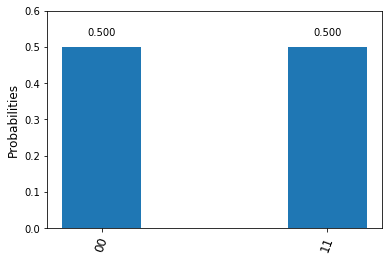

In [25]:
job = execute(h2, qasm_backend, shots=5000)
plot_histogram(job.result().get_counts(h2))

Qubits can "interact" via certain gates ... The *Controlled Not* (CNOT) gate (CX)...

Flip the second bit (target) if the first bit (control) is 1

CX $ = \begin{bmatrix} 1 && 0 && 0 && 0 \\ 0 && 1 && 0 && 0 \\ 0 && 0 && 0 && 1 \\ 0 && 0 && 1 && 0 \end{bmatrix} $

$\text{CX}|00\rangle = |00\rangle$, $\text{CX}|01\rangle = |01\rangle$, $\text{CX}|10\rangle = |11\rangle$, $\text{CX}|11\rangle = |10\rangle$, 

We've seen this before with the coins. There's CY, CZ, CPhase too.

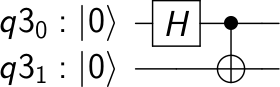

In [21]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
h2 = QuantumCircuit(q2)
h2.h(q2[0])
h2.cx(q2[0], q2[1])
circuit_drawer(h2)

$ \left| 00 \right> \rightarrow \frac{\left| 00 \right>  + \left| 10 \right>}{\sqrt{2}} \rightarrow \frac{\left| 00 \right>  + \left| 11 \right>}{\sqrt{2}}  $

$ \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} \rightarrow \begin{bmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \\ 0 \end{bmatrix} \rightarrow \begin{bmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ 0 \\ \frac{1}{\sqrt{2}} \end{bmatrix}$

Let's try it

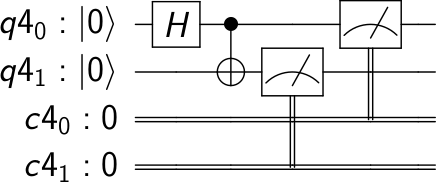

In [22]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
h2 = QuantumCircuit(q2, c2)
h2.h(q2[0])
h2.cx(q2[0], q2[1])
h2.measure(q2[0], c2[0])
h2.measure(q2[1], c2[1])
circuit_drawer(h2)

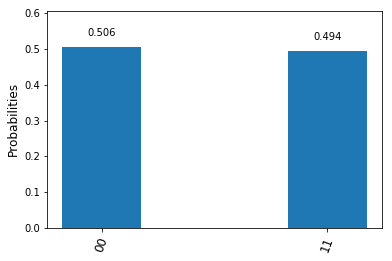

In [26]:
job = execute(h2, qasm_backend, shots=5000)
plot_histogram(job.result().get_counts(h2))

Final state is a Bell Pair (or EPR Pair) and is fully *entangled* (**not decomposable** into a tensor product).

If Alice measures her qubit, we know what Bob's has to be. This isn't really "spooky action at a distance"; the states are correlated and Bob doesn't really notice any difference. 

BUT, what if Alice measures her qubit in the $\{+, -\}$ basis? We can mimic this by Hadamarding Alice's qubit (#1) and measuring in the computational basis. Bob doesn't do anything special to his qubit (#2)

$\frac{1}{\sqrt{2}}(H \otimes I_2)\left( |00\rangle + |11\rangle \right) = \frac{1}{2}\left(|00\rangle + |10\rangle + |01\rangle - |11\rangle\right)$

Alice measures her qubit. The state of the system is then,
$|0\rangle\left(\frac{|0\rangle + |1\rangle}{\sqrt{2}}\right)$ or $|1\rangle\left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right)$

Bob's qubit is now in the $|+\rangle$ or $|-\rangle$ state. Can Bob get information faster than speed of light?

It still turns out that there is no spooky action at a distance because Bob can't observe this change. If he measures in the computational basis, he'll still measure the correct probabilities for $|0\rangle$ and $|1\rangle$. If he switches to the  $\{+, -\}$ basis, he Hadamards his state and gets either $|0\rangle$ or $|1\rangle$ and that measures to the right thing and corresponds to Alice. 

How about three qubits?

In general,
$|\psi\rangle = a|000\rangle + b|001\rangle + c|010\rangle + d|011\rangle + e|100\rangle + f|101\rangle + g|110\rangle + h|111\rangle$<BR/>There are $2^n = 8$ complex numbers to describe a state

If we tensor product,
$|\phi\rangle = (a_1|0\rangle + b_1|1\rangle) \otimes (a_2|0\rangle + b_2|1\rangle \otimes (a_3|0\rangle + b_3|1\rangle)$<BR/>
$|\phi\rangle$ will have 8 coefficients, but we only need 6 complex numbers to describe them.<BR/>
In general, we only need $2n$ complex numbers (not $2^n$) when we tensor product $n$ states (linear scaling).

The non-seperable (entangled) states fill in the rest of the space. To make them, we must couple qubits, like with the CNOT gate. 





## Let's look at Quantum Computing speedup

This is the promise of QC!

Note that many quantum algorithms are **very** involved. As Dr. Mohapatra used to say, "That's hard. It's not the kind of thing you do in front of a class!".

But we'll do one of the simpler ones to get a feel for what's involved. We'll go over more algorithms in the next session. 

## Deutch's Algorithm (1992)

Say we have a black box that applies a function to a single bit (0 or 1). We can query the black box with different inputs and classify the unknown function within. We want to query the black box the fewest times as possible. 

Inside the black box are two "classes' of functions...

**Constant** <BR/>
The output is the same regardless of the input<BR/>
$f(x) = 0$, $f(x) = 1$

**Balanced** <BR/>
The outputs will be opposite for half the inputs<BR/>
$f(x) = x$, $f(x) = \bar{x}$, where $\bar{x} = 1 \oplus x$ (exclusive OR) thus flipping the value of $x$<BR/>
Note the exclusive OR: $0 \oplus 0 = 0, \, \, \, $ $1 \oplus 0 = 1,\, \, \, $ $0 \oplus 1 = 1,\, \, \, $$1 \oplus 1 = 0$

Again: the black box has either a constant function or a balanced function. We want to figure out which one by querying the black box the fewest number of times.

Classically, we must query the black box **twice** to figure out the classification. 

Let's go Quantum!

Classically, we must query for each input. Quantumly(?), we can use a superposition state and try more than one input at the same time! Let's see how that works.

We need a unitary operator, $U_f$, that applies the unknown function (this is typically called an $oracle$). Note that unitary operators are reversable. We cannot construct a unitary $U_f$ such that it takes only one qubit. We can do two, so we'll supply a second or "ancilary" qubit [this is common in quantum algorithms]. $U_f$ will leave the first qubit $|x\rangle$ unchanged. For the second qubit $|y\rangle$, it be the result of exclusive OR between $|y\rangle$ and the result of the function applied to the first qubit $|x\rangle$. That is,

$U_f|x, y\rangle = |x, y \oplus f(x)\rangle\, \, \,$ where $x, y \in [0, 1]$



Let's Hadamard $|x\rangle$ (the input) into a superposition state, leave $|y\rangle$ in $|0\rangle$ and apply the oracle. Here is the circuit...
<img src="images/deutchCircuit.png" width="50%" />
The output will be,
$U_f \left(\frac{|0\rangle + |1\rangle}{\sqrt{2}}\right)|0\rangle = \frac{1}{\sqrt{2}}(U_f |00\rangle + U_f |10\rangle) = \frac{|0, 0 \oplus f(0)\rangle + |1, 0 \oplus f(1)\rangle}{\sqrt{2}} = \frac{|0,f(0)\rangle + |1,f(1)\rangle}{\sqrt{2}}$

We end up with a superposition state that has information about all values of $f(x)$ in *one* step! But we have to **measure** this system. We'll get one of the two states and so the outcomes are completely random. This is *worse* than classical since we can't control which input we're testing. Let's go home.

A different way... Let's make more states! Let's put $|y\rangle$ into the $|1\rangle$ state and Hadamard it too. We'll then apply the oracle. We'll then get $|x\rangle$ out of superposition by Hadamarding it again. So,

$|\psi_{out}\rangle = (H \otimes I)U_f(H \otimes H)|0\rangle |1\rangle $

So, $(H \otimes H)|0\rangle |1\rangle = \left(\frac{|0\rangle + |1\rangle}{\sqrt{2}}\right)\left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right) = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$

Now we have a superposition that will generate all possible values of $x, f(x)$ simultaneously. 

after some work, you'll get...

$|\psi_{out}\rangle = (1 - f(0) - f(1)) |0\rangle \left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right) + (f(1) - f(0)) |1\rangle \left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right) $

If $f(x)$ is **constant** so $f(0) = f(1)$ (f returns the same regardless of the input), then
$|\psi_{out}\rangle = \pm |0\rangle \left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right)$

If $f(x)$ is **balanced** so $f(0) \neq f(1)$, $|\psi_{out}\rangle = \pm |1\rangle \left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right)$

Measuring the first qubit tells us the answer with one query to $U_f$ !!  We win!!!

## Deutch-Jozsa Algorithm generalizes to $n$ qubits

<center><img src="images/djAlgo.png" width="45%"/></center>

Classicaly, would need to evaluate at least twice and no worse than $2^{n-1} + 1$ times

The final quantum state is (**with one call to the Oracle**)...
$$|\psi_{out}\rangle = \frac{1}{2^n}\sum_y \sum_x (-1)^{xy + f(x)}|y \rangle  \left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right) $$
If measure $n$ $|0\rangle$ then constant. Otherwise balanced. 


## Advantages of a Quantum Computer...

- **Quantum Superposition:** The information in a state is exponential to the number of qubits. 
- **Quantum Parallelism:** We can construct unitary transformations that can change all of the complex numbers in a system simulataneously. 

The steps in Deutch-Jozsa were not obvious (this is why many Quantum Algorithms are named after the authors - they aren't easy to figure out). 

## Complications: No-cloning

Remember that we cannot clone quantum states ...

Say we have two states $|\psi\rangle$ and $|\phi\rangle$. Suppose we have a Unitary operator that,

$U(|\psi\rangle \otimes |\chi\rangle) = |\psi\rangle \otimes |\psi\rangle$ and
$U(|\phi\rangle \otimes |\chi\rangle) = |\phi\rangle \otimes |\phi\rangle$ 

Take inner products (note $U^\dagger U = I$)...<BR/>
    Left hand sides: $(\langle \psi | \otimes \langle \chi | U^\dagger)(U|\phi\rangle \otimes |\chi \rangle) = \langle \psi | \phi \rangle \langle \chi | \chi \rangle = \langle \psi | \phi \rangle$ <BR/>
    right hand sides: $(\langle \psi | \phi \rangle)^2$

So we have $\langle \psi | \phi \rangle = (\langle \psi | \phi \rangle)^2$

That only works if $|\psi\rangle$ and $|\phi\rangle$ are orthogonal or identical (so you can clone classical states)

Therefore, we cannot copy arbitrary states.

## We can't clone states, but we can move them around ... Teleportation

Alice wants to send Bob an unknown quantum state $|\chi\rangle = \alpha |0\rangle + \beta |1\rangle$ (unknown means she hasn't measured it and doesn't know the coefficients). 

Here's the procedure...

Alice and Bob get together and create and EPR state $|EPR> = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$
Alice "owns" the first qubit and Bob "owns" the second. They take their qubits far away from each other. 

Now Alice lets $|\chi\rangle$ interact with her qubit from the EPR state. 

$|\psi\rangle = |\chi\rangle \otimes |EPR\rangle = \frac{\alpha(|000\rangle + |011\rangle) + \beta(|100\rangle + |111\rangle)}{\sqrt{2}}$

The first two qubits now belong to Alice and the last belongs to Bob (e.g. $|AAB\rangle$)


$|\psi\rangle = |\chi\rangle \otimes |EPR\rangle = \frac{\alpha(|000\rangle + |011\rangle) + \beta(|100\rangle + |111\rangle)}{\sqrt{2}}$

Alice now applies a CNOT gate... the control bit is from $|\chi\rangle$ and the target bit is hers from the EPR pair. 

$|\psi'\rangle = U_{CNOT}|\psi\rangle = \frac{\alpha(|000\rangle + |011\rangle) + \beta(|110\rangle + |101\rangle)}{\sqrt{2}}$

Now Alice applies a Hadamard gate to her first qubit (Bob still owns the third qubit and is far away).

$|\psi''\rangle = H|\psi'\rangle = \alpha \left( \frac{|0\rangle + |1\rangle}{\sqrt{2}}\right) \frac{(|00\rangle + |11\rangle)}{\sqrt{2}} + \beta \left( \frac{|0\rangle - |1\rangle}{\sqrt{2}}\right) \frac{(|10\rangle + |01\rangle)}{\sqrt{2}}$

Now Alice measures her two qubits. Let's recast $|\psi''\rangle$ into a more convenient form...

$|\psi''\rangle = \frac{1}{2}\left[|00\rangle (\alpha |0\rangle + \beta |1\rangle) + |01\rangle (\alpha |1\rangle + \beta |0\rangle) + |10\rangle (\alpha |0\rangle - \beta |1\rangle) + |11\rangle (\alpha |1\rangle -
\beta |0\rangle)\right]$

Outcomes:
- If Alice measures $|00\rangle$, then Bob has $|\chi\rangle$ in his posession!
- If Alice measures $|01\rangle$, then Bob can apply an $X$ (NOT) gate to his qubit and obtain $|\chi\rangle$
- If Alice measures $|10\rangle$, then Bob can apply a $Z$ gate and obtain $|\chi\rangle$
- If Alice measures $|11\rangle$, then Bob nees to apply the $X$ gate and then a $Z$ gate

Alice needs to communicate to Bob on a classical channel to tell him what to do based on her measurement. This prevents faster than light communication. It is secure - someone evesdropping on Alice can't figure out Bob's state from her information. And if someone steals Bob's state, it is useless without the information from Alice. 

The $|\chi\rangle$ state that Alice had is destroyed by the end of the teleportation process. 

## Next time

- We'll talk about how quantum computers work and noise problems
- We'll try some algorithms on simulators! Be ready!
- Hopefully, we'll have time to talk more about noise and how to mitigate

See you next Tuesday!

**Please send me feedback!**